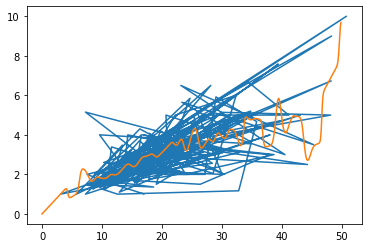

In [18]:
#Importing Modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Tou Value
tou = 0.5

#Reading data from the file
data=pd.read_csv("./tips.csv")

#Data Preprocessing 
X_train = np.array(data.total_bill)
X_train = X_train[:, np.newaxis]

X_test = np.array([i /10 for i in range(500)])
X_test = X_test[:, np.newaxis]

y_train = np.array(data.tip)
y_test = []

count = 0

#Calculation of parameters and prediction
for r in range(len(X_test)):
        wts = np.exp(-np.sum((X_train - X_test[r]) ** 2, axis=1) / (2 * tou ** 2))
        W = np.diag(wts)
        factor1 = np.linalg.inv(X_train.T.dot(W).dot(X_train))
        parameters = factor1.dot(X_train.T).dot(W).dot(y_train)
        prediction = X_test[r].dot(parameters)
        y_test.append(prediction)
        count += 1
        

y_test = np.array(y_test)

#Plotting graph for visualization of output
plt.plot(X_train.squeeze(), y_train)
plt.plot(X_test.squeeze(), y_test)
plt.show()